In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab2/moon.png
!ls

moon.png  sample_data


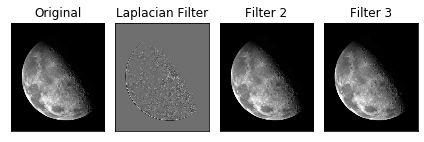

In [0]:
#Your Code
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread, imsave, imshow
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage.filters



def main():

  image = io.imread('moon.png')


  kernel = -np.ones((3,3),np.float32)
  kernel[1,1] = 8

  kernel1 = np.array([[0,0,0], [0,1,0], [0,0,0]])
  kernel2 = np.array([[0,0,0], [0,0,1], [0,0,0]])


  newIM = convolve(image, kernel)

  newIM = (newIM - np.amin(newIM))/(np.amax(newIM)- np.amin(newIM))



  secondFilter = convolve(image, kernel1)
  secondFilter = (secondFilter - np.amin(secondFilter))/(np.amax(secondFilter)- np.amin(secondFilter))

  thirdFilter = convolve(image, kernel2)
  thirdFilter = (thirdFilter - np.amin(thirdFilter))/(np.amax(thirdFilter)- np.amin(thirdFilter))


  plt.subplot(141)
  plt.title('Original')
  plt.xticks([]), plt.yticks([])

  imshow(image)

  plt.subplot(142)
  plt.title('Laplacian Filter')
  plt.imshow(newIM, cmap='gray', vmin = 0, vmax = 1)
  plt.xticks([]), plt.yticks([])

  plt.subplot(143)
  plt.title('Filter 2')
  plt.imshow(secondFilter, cmap='gray', vmin = 0, vmax = 1)
  plt.xticks([]), plt.yticks([])

  plt.subplot(144)
  plt.title('Filter 3')
  plt.imshow(thirdFilter, cmap='gray', vmin = 0, vmax = 1)
  plt.xticks([]), plt.yticks([])
 

def convolve(image, kernel):
  imageLength = image.shape[0]
  imageWidth = image.shape[1]

  kernelLength = kernel.shape[0]
  kernelWidth = kernel.shape[1]

  length = (kernelLength - 1)//2
  width = (kernelWidth - 1)//2

  newFilter = np.zeros((imageLength, imageWidth))
  
  for i in np.arange(length, imageLength-length):
    for j in np.arange(width, imageWidth-width):
      output = 0
      for k in np.arange(-length, length+1):
        for l in np.arange(-width, width+1):
          newIM = image[i+k, j+l]
          newKernel = kernel[length+k, width+l]
          output += (newKernel * newIM)
      newFilter[i,j]= output
  return newFilter
  
if __name__== "__main__":
  main()





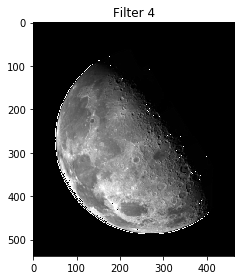

In [0]:
#Your Code
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread, imsave, imshow
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage.filters

image = io.imread('moon.png')
original = io.imread('moon.png')
length, width = image.shape

paddedImage = np.pad(original, pad_width=1, mode ='reflect')

for i in range(0, length):
  for j in range(0, width):
    image[i][j] = np.mean(paddedImage[i:i+3,j:j+3])

filter4 = original +(original - image)

plt.title('Filter 4')
io.imshow(filter4)
io.show()
